#Task 1- Installing Requirements

In [1]:
!pip install --quiet cirq
!pip install qiskit
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 93.2 MB/s eta 0:00:00
   ━━━━

# Task 1 - Required Imports (Run Before Task-1 Part-1 and 2)

**Cirq:**

In [1]:
import cirq
import cirq_google
from cirq.contrib.svg import SVGCircuit

**Qiskit:**

In [2]:
from qiskit.circuit import QuantumCircuit, Parameter

**Misc:**

In [3]:
import numpy as np
import pylatexenc
import matplotlib

# Task 1 - Part 1 (Using Cirq)

In [4]:
qubits=[cirq.LineQubit(i) for i in range(5)] #I am using line qubits. Here I am creating them and storing them in a list

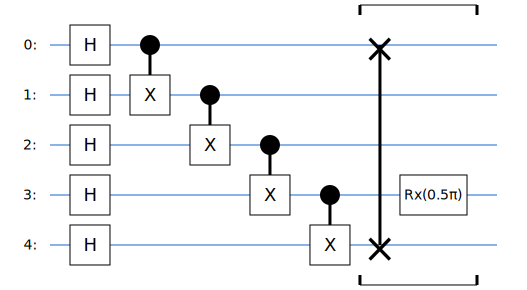

In [5]:
circuit=cirq.Circuit() #creating empty circuit
circuit.append(cirq.H.on_each(qubits))               #Applying hadamard on all of them

circuit.append([cirq.CNOT(qubits[0],qubits[1]),      #Here I am appending a list of CNOT gate objects to the circuit. Each CNOT gate has first qubit controla and second as target
                cirq.CNOT(qubits[1],qubits[2]),
                cirq.CNOT(qubits[2],qubits[3]),
                cirq.CNOT(qubits[3],qubits[4])])

circuit.append(cirq.SWAP(qubits[0],qubits[4]))       #This is the swap gate for first and last qubit

circuit.append(cirq.rx(np.pi/2)(qubits[3]))          #Here I am applying the rx gate i.e. rotate about x-axis gate.

SVGCircuit(circuit)                                  #I have used SVGCircuit for showing a good picture of the circuit. However print(circuit) would also give an accurate representation

# Task 1- Part 2 (Using Qiskit)

In [6]:
circuit=QuantumCircuit(5,1)
circuit.h([0,2,3,4])      #Applying hadamard to first, third and fourth qubit. We laso applied it to the 5th qubit as we are using that as the ancilla in our swap test
circuit.rx(np.pi/3,1)     #rotating second qubit by pi/3 around X
circuit.cswap(4,0,2)      #Fredkin on 1st and 3rd with last qubit as control
circuit.cswap(4,1,3)      #Fredkin on 2nd and 4th with last qubit as control
circuit.h(4)              #Applying hadamard on ancilla again
circuit.measure(4,0)      #measuring ancilla (Greater probability of 0 means greater similarity. We can find probability through a sampler)
print(circuit)
#Here we can also use circuit.draw('mpl') for a beautified version

        ┌───┐                 
q_0: ───┤ H ├────X────────────
     ┌──┴───┴──┐ │            
q_1: ┤ Rx(π/3) ├─┼──X─────────
     └──┬───┬──┘ │  │         
q_2: ───┤ H ├────X──┼─────────
        ├───┤    │  │         
q_3: ───┤ H ├────┼──X─────────
        ├───┤    │  │ ┌───┐┌─┐
q_4: ───┤ H ├────■──■─┤ H ├┤M├
        └───┘         └───┘└╥┘
c: 1/═══════════════════════╩═
                            0 


# Task-2 Installing Requirements (Run before going to Task 2- Required Imports)

In [7]:
!pip install energyflow           #for loading quark-gluon data
!pip install torch
!pip install torch-geometric
!pip install torch-cluster        #this might take 10-15 mins to install. Ateast that was the case on colab
!pip install scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.8/700.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.2/502.2 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

# Task-2 Required Imports (Run before running the Task-2 Graph Based ...)

In [8]:
import torch
import torch.nn as nn
from torch.nn import functional
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
from torch_geometric.nn import global_mean_pool, global_max_pool, GATConv, EdgeConv
from sklearn.model_selection import train_test_split
from torch_cluster import knn_graph
import energyflow

# Task-2 Graph Based Quark-Gluon Classification Architectures

The objective of task-2 is to explore two graph based architectures for classification of quarks and gluon jets in the dataset provided in the task.

I have chosen the following graph based architectures:


1.   Graph Attention Networks (**GAT**)
2.   Dynamic Graph Convolutional Neural Networks (**DGCNN**)


**Before I explore these models, I would like to explain how I projected this dataset to a set of interconnected nodes and edges-**

Each jet in the dataset has been considered as a graph (i.e set of interconnected nodes and edges). There are 100,000 jets in total. Thus we would have 100,000 graphs.

Every jet is a 2-D array in the dataset. It is an array of particles. Every particle in the jet is a 1-D array consisting of 4 features (pt, rapidity, azimuthal angle, and pdgid)

Thus I am considering every particle in the jet as a node inside the graph. The features are basically attributes of that node. Since features can vary over several orders of magnitude, I also normalize each feature which helps in stabilizing training and ensures that all features contribute comparably when computing distances. The dataset is also padded with zeros as particles for jets that have lesser than the maximum number of particles. However, these don't provide any information thus they are removed.

Now coming to edges, I constructed edges for each node by using the k-Nearest Neighbors approach. For every node, I connected it to its k-NN based on euclidean distance in the feature space.  In the current case, using k=16 neighbors typically provides sufficient connectivity for the GAT or DGCNN to learn meaningful representations without overwhelming the model with too many edges.

Also, in the k-NN graph, I have not included self-loops (edges from a node to itself) since they do not provide additional relational information.

Additionaly, GAT uses a fixed (static) graph using the raw features. In case of DGCNN, the benefit is in dynamically recomputing the k-NN graph at each layer to capture evolving relationships as the node features get updated.

Once the nodes are processed by the network layers, I have applied global pooling to aggregate node-level information into a single, fixed-size graph-level representation. This aggregated vector is used for the final classification task.







The **create_graph_list** function below shows what I have written above.

It loads the data set as two arrays-

A 3-D array (X) of shape (N,M,d) where N is the number of jets, M is max number of particles per jet and d is the number of features per particle.

A 1-D array (Y) of the output labels (Quark/Gluon) for every jet

Then performs normalization, removing padding, k-NN graph finding.
It returns a list of PyG objects which are basically jets wrapped up with their respective labels. Run the cell below to preprocess the dataset and get it into appropriate for running through the models

In [9]:
def create_graph_list(k):

    X,Y=energyflow.qg_jets.load(num_data=100000, pad=True, ncol=4, generator='pythia',with_bc=False, cache_dir='~/.energyflow')     #loading the QG dataset X is 3-D array and Y is 1-D

    data_list=[]

    for i in range(X.shape[0]):                                      #Iterating through the jets to create a graph for each jet
        x=torch.tensor(X[i], dtype=torch.float)                      # shape: (M, d)
        x=(x-x.mean(dim=0))/x.std(dim=0)                             #Normalizing the features across particles (for each feature column).
        mask=(x.abs().sum(dim=1)>1e-8)                               #Removing padded particles (all input features 0)
        x=x[mask]
        edge_index=knn_graph(x,k=k,loop=False)                       #Finds k-NN for every node/particle in the graph/jet in feature space (uses Euclidean distance)
        label=torch.tensor([Y[i]],dtype=torch.long)                  #I am wrapping the label as a tensor as well to add to the PyG data object
        data_list.append(Data(x=x,edge_index=edge_index,y=label))    #creating a PyG data object and appending it to a list of graphs. Each graph/jet is a PyG object

    return data_list

**GAT:**

GAT layers learn to weigh each neighbor’s influence differently by computing attention scores. Multiple attention heads allow the model to capture different types of interactions. This is why I have chose GAT as one of my architectures as not all particles contribute equally to identifying a jet as quark- or gluon-initiated. GAT’s attention mechanism lets the network focus more on the most informative particle interactions. The heads enable the network to learn various aspects of the relationships between particles, which is crucial given the complex structure of jets.


After processing through three GAT layers, I have used global mean pooling to aggregate node features into a single graph-level feature, which is then fed into a fully connected layer for classification.

Below is the implementation of the GAT. Please run the cell so that it can be used later.

In [10]:
class QG_GAT(nn.Module):

  def __init__(self, in_channels, hidden_channels, out_channels=2, heads=4):

    super().__init__()
    #3 processing layers
    self.layer_1=GATConv(in_channels, hidden_channels, heads=heads, concat=True)             #'heads' attention heads and their outputs concatenated. Outputs are feature vectors of hidden channels
    self.layer_2=GATConv(hidden_channels*heads, hidden_channels, heads=heads, concat=True)   #Thus input channels is hidden_channels*heads. Same heads, concatenation and output feature vector size as as before
    self.layer_3=GATConv(hidden_channels*heads, hidden_channels, heads=1, concat=False)      #1 attention head only now therefore the fc layer gets a feature vector of hidden_channels size

    self.fc=nn.Linear(hidden_channels, out_channels)                                         #maps to final outputs

  def forward(self, x, edge_index, batch):

    x=functional.elu(self.layer_1(x, edge_index))                                            #Applying GAT layers with ELU activation.
    x=functional.elu(self.layer_2(x, edge_index))
    x=functional.elu(self.layer_3(x, edge_index))

    x=global_mean_pool(x, batch)

    return self.fc(x)

**DGCNN-**

Instead of using a fixed graph, DGCNN recomputes the graph (using k-NN) at every layer. This means that after each layer, as the node features change, the graph’s connectivity is updated accordingly. Thus, I used DGCNN the network learns, the optimal relationships between particles can change. DGCNN’s dynamic graph construction allows the network to update these relationships at every layer, capturing higher-level, context-dependent interactions.

DGCNN uses EdgeConv layers that consider both a node and its neighbors. EdgeConv layers are particularly good at learning local structures, which is important because the spatial and energy distributions of particles in a jet are key to distinguishing between quark and gluon jets.

After several EdgeConv layers, global pooling (both max and mean) aggregates the node features into a graph-level feature vector, which is then passed through a fully connected layer to yield class scores.


Below is the implementation of the DGCNN. Please run the cell so that it can be used later.

In [11]:
class QG_DGCNN(nn.Module):

  def __init__(self, in_channels, hidden_channels, out_channels=2, k=16):

    super().__init__()
    self.k=k
    #4 processing layers
    self.conv_layer_1=EdgeConv(nn.Sequential(nn.Linear(2*in_channels, hidden_channels),nn.ReLU(), nn.Linear(hidden_channels,hidden_channels)))            #Input dimension is 2*in_channels because features of a node and its neighbor are concatenated. Outputs a feature vector of size hidden channels
    self.conv_layer_2=EdgeConv(nn.Sequential(nn.Linear(2*hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels,hidden_channels)))       #Input dimension is 2*hidden_channels (from previous layer's output)
    self.conv_layer_3=EdgeConv(nn.Sequential(nn.Linear(2*hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels,hidden_channels)))
    self.conv_layer_4=EdgeConv(nn.Sequential(nn.Linear(2*hidden_channels, hidden_channels), nn.ReLU(), nn.Linear(hidden_channels,hidden_channels)))

    self.conv_layer_list=[self.conv_layer_1, self.conv_layer_2, self.conv_layer_3, self.conv_layer_4]                                #Save all EdgeConv layers in a list for iteration in the forward pass

    self.fc=nn.Linear(hidden_channels*2, out_channels)                                                                               #Takes the concatenated output from global max and mean pooling (2*hidden_channels) and maps it to out_channels classes


  def forward(self, x, edge_index, batch):

    for layer in self.conv_layer_list:
      edge_index = knn_graph(x, k=self.k, batch=batch, loop=False)                 #Dynamically computing the k-NN graph based on the current node features
      x=layer(x, edge_index)                                                       #Updating the node features using the current EdgeConv layer

    x_max=global_max_pool(x, batch)
    x_mean=global_mean_pool(x, batch)
    x=torch.cat([x_max, x_mean], dim=1)                                            #Concatenating both pooled representations to form a graph-level feature vector

    return self.fc(x)

Below are functions for training and testing. These are used for a single epoch and are iteratively run later in main() for multiple (20) epochs

Please run the cell so that they can be used later

In [12]:
def train_epoch(model, loader, optimizer, device):

    model.train()                                                 #Putting model in train mode
    total_loss=0
    for batch in loader:                                          #going through the batches here
        batch=batch.to(device)
        optimizer.zero_grad()                                     #I am clearing all previous gradient computations here
        forward=model(batch.x, batch.edge_index, batch.batch)     #Running the forward method in the given model here
        loss=functional.cross_entropy(forward, batch.y)           #Calculating cross entropy loss
        loss.backward()                                           #Backpropagation
        optimizer.step()                                          #Updating the parameters
        total_loss+=loss.item()*batch.num_graphs                  #Loss for each batch is weighted with the number of graphs in each batch
    return total_loss/len(loader.dataset)                         #Returns the average loss per graph/jet for an epoch

def test_epoch(model, loader, device):

    model.eval()                                                  #Putting model in evaluation mode
    correct=0
    for batch in loader:
        batch=batch.to(device)
        with torch.no_grad():                                     #Disabling gradient computation for evaluation
            forward=model(batch.x, batch.edge_index, batch.batch) #Running the forward method in the model here
            prediction=forward.argmax(dim=1)                      #Predicted class
            correct+=prediction.eq(batch.y).sum().item()          #Number of correctly predicted graphs
    return correct/len(loader.dataset)                            #Returning accuracy

Below is the main functions that trains and tests both these models on 'num_epochs' epochs. I am using 20 as num_epochs when I call main.

Please run the cell to train, test and generate best accuracy values when predicting with both models.

I only split the dataset into training and test sets for simplicity, but a validation set can be put in as well with a different split.

In [14]:
def main(num_epochs):

    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')          #Checking if MPS (as I am training on a MacBook Pro) is available and using it if it is. Otherwise using CPU
    print(device) #Can be used for checking what device being used for training
    data_list=create_graph_list(k=16)                                                   #I am using k as 16 for k-NN
    train_data,test_data=train_test_split(data_list, test_size=0.2, random_state=42)    #I have used a 80:20 split for training and testing data

    train_loader=DataLoader(train_data, batch_size=32, shuffle=True)                    #I am doing batch processing here
    test_loader=DataLoader(test_data, batch_size=32, shuffle=False)                     #Each Batch contains 32 graphs/jets and training data batches have been shuffled

    in_channels=data_list[0].x.shape[1]                                                 #Number of input freatures per particle/node (i.e. d in (N,M,d))

    gat_model=QG_GAT(in_channels, hidden_channels=64, out_channels=2, heads=4).to(device)   #Instance of our Quark Gluon GAT Classifier
    dgcnn_model=QG_DGCNN(in_channels, hidden_channels=64, out_channels=2, k=16).to(device)  #Instance of the DGCNN Classifier

    gat_optimizer=torch.optim.Adam(gat_model.parameters(), lr=1e-3)                            #I am using ADAM for training with 10^-3 learning rate
    dgcnn_optimizer=torch.optim.Adam(dgcnn_model.parameters(), lr=1e-3)

    gat_best_accuracy, dgcnn_best_accuracy=0,0                                         #Starting Training and Testing here over num_epochs

    for epoch in range(num_epochs):

        gat_train_loss = train_epoch(gat_model, train_loader, gat_optimizer, device)
        gat_train_accuracy = test_epoch(gat_model, train_loader, device)
        gat_test_accuracy = test_epoch(gat_model, test_loader, device)

        dgcnn_train_loss = train_epoch(dgcnn_model, train_loader, dgcnn_optimizer, device)
        dgcnn_train_accuracy = test_epoch(dgcnn_model, train_loader, device)
        dgcnn_test_accuracy = test_epoch(dgcnn_model, test_loader, device)

        if gat_test_accuracy>gat_best_accuracy:
            gat_best_accuracy=gat_test_accuracy
            torch.save(gat_model.state_dict(), 'best_gat_model.pt')                    #Saving the best model parameters for later use. I can load into the model if I wish to

        if dgcnn_test_accuracy>dgcnn_best_accuracy:
            dgcnn_best_accuracy=dgcnn_test_accuracy
            torch.save(dgcnn_model.state_dict(), 'best_dgcnn_model.pt')

        print(f"Epoch: {epoch+1:02d}")
        print(f"GAT Loss: {gat_train_loss:.4f}, GAT Train Accuaracy: {gat_train_accuracy:.4f}, GAT Test Accuracy: {gat_test_accuracy:.4f}")
        print(f"DGCNN Loss: {dgcnn_train_loss:.4f}, DGCNN Train Accuaracy: {dgcnn_train_accuracy:.4f}, DGCNN Test Accuracy: {dgcnn_test_accuracy:.4f}")
        print()

    print(f"\nTraining complete")
    print("Best GAT Accuracy:", gat_best_accuracy)
    print("Best DGCNN Accuracy:", dgcnn_best_accuracy)

if __name__=="__main__":
    main(num_epochs=20)

cuda


/usr/local/lib/python3.11/dist-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch: 01
GAT Loss: 0.4998, GAT Train Accuaracy: 0.7719, GAT Test Accuracy: 0.7765
DGCNN Loss: 0.5007, DGCNN Train Accuaracy: 0.7752, DGCNN Test Accuracy: 0.7788

Epoch: 02
GAT Loss: 0.4904, GAT Train Accuaracy: 0.7735, GAT Test Accuracy: 0.7781
DGCNN Loss: 0.4853, DGCNN Train Accuaracy: 0.7768, DGCNN Test Accuracy: 0.7811

Epoch: 03
GAT Loss: 0.4878, GAT Train Accuaracy: 0.7759, GAT Test Accuracy: 0.7804
DGCNN Loss: 0.4817, DGCNN Train Accuaracy: 0.7763, DGCNN Test Accuracy: 0.7784

Epoch: 04
GAT Loss: 0.4863, GAT Train Accuaracy: 0.7758, GAT Test Accuracy: 0.7798
DGCNN Loss: 0.4786, DGCNN Train Accuaracy: 0.7763, DGCNN Test Accuracy: 0.7772

Epoch: 05
GAT Loss: 0.4841, GAT Train Accuaracy: 0.7765, GAT Test Accuracy: 0.7802
DGCNN Loss: 0.4768, DGCNN Train Accuaracy: 0.7808, DGCNN Test Accuracy: 0.7849

Epoch: 06
GAT Loss: 0.4824, GAT Train Accuaracy: 0.7754, GAT Test Accuracy: 0.7814
DGCNN Loss: 0.4741, DGCNN Train Accuaracy: 0.7838, DGCNN Test Accuracy: 0.7893

Epoch: 07
GAT Loss: 0.

#Task-3

Inspired by my experience at the Yale Quantum Hackathon in April 2024, I spent that summer immersed in the IBM Quantum Platform and I started learning quantum computing. Since then, I have taken up coursework, done an internship project on Quantum Security, won two hackathons via quantum projects and I am also a research assistant at UConn exploring variational quantum algorithms like QAOA, and quantum key distribution protocols like BB84. Specifically in QAOA I am working with mixed binary optimization with ADMM formulations combined with QAOA. I have dived deep into the source code to do tasks such as sample filtering which is not available by default in the qiskit SDK. I am familiar with qiskit, cirq, and pennylane SDKs for development but I prefer qiskit and cirq as they seem more deterministic and intuitive to me.

My experiences so far have made me strongly interested in hybrid quantum-classical methods and their applications in complex optimization and pattern recognition tasks, which makes me particularly excited about the Q-MAML project.

#Task 11: Installing Requirements

In [3]:
#All modules installed previously
#!pip install torch
!pip install --quiet cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.5 MB/s eta 0:00:00
   ━━━━━

#Task 11: Required Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import cirq
import math

#Task-11: Code

Hyperparameter Setup:

In [2]:
n_qubits = 4             #Using 4 qubits
n_params = 3 * n_qubits  # Each qubit has 3 rotation angles
n_samples = 50           # dataset size
n_epochs = 20            # training on 20 epochs
learning_rate = 0.02     # using lr = 0.02
eps = 1e-3               # finite-difference step size

input_dim = 5            # dimension of each input vector
hidden_dim = 16
output_dim = n_params    # MLP output: parameters for PQC

  Circuits:

In [3]:
def build_circuit(params):
    """
    Build a 4-qubit circuit in Cirq applying single-qubit rotations
    and a chain of CNOTs, then measure the Z-expectation of qubit 0.
    """

    qubits = [cirq.LineQubit(i) for i in range(n_qubits)]  # Creating 4 linequbits


    reshaped = params.reshape(n_qubits, 3) # Converting params into shape (4, 3)
    # Each qubit i has 3 angles: (rX, rY, rZ) or we can do cirq.Rot, but let's just do separate rotations

    circuit = cirq.Circuit()

    # Single-qubit rotations
    for i in range(n_qubits):
        rx_angle, ry_angle, rz_angle = reshaped[i]
        circuit.append(cirq.rx(rx_angle)(qubits[i]))
        circuit.append(cirq.ry(ry_angle)(qubits[i]))
        circuit.append(cirq.rz(rz_angle)(qubits[i]))

    # Chain of CNOTs for entangling
    for i in range(n_qubits - 1):
        circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]))

    return circuit, qubits

def run_circuit(params):
    """
    Construct and run the circuit, then return the expectation value of Z on qubit 0.
    """
    circuit, qubits = build_circuit(params)


    # We measure <Z> by appending a measurement in the computational basis in a simulation. For expectation using cirq's built in simulator
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    final_state = result.final_state_vector   # final_state is a complex state vector of length 2^n_qubits

    # Expectation of Z on qubit 0 for state |psi> = sum_k alpha_k |k>.
    # |0>_Z -> amplitude indices that have 0 in the first qubit bit; |1>_Z -> those that have 1 in first qubit bit.
    # In general: <psi|Z_0|psi> = sum_{k} |alpha_k|^2 * z_k, where z_k = +1 if qubit-0 bit is 0, else -1.

    exp_val = 0.0
    dim = 2 ** n_qubits
    for idx in range(dim):
        amp = final_state[idx]
        prob = (amp.real**2 + amp.imag**2)
        # bit of qubit0 is (idx & 1)
        bit0 = (idx & 1)
        z_val = 1.0 if bit0 == 0 else -1.0
        exp_val += z_val * prob

    return torch.tensor([exp_val], dtype=torch.float32)

Custom Autograd Class for the Circuits:

In [4]:
class CircuitFunction(torch.autograd.Function):
    """
    A class that does forward pass by simulating the circuit,
    and backward pass by finite-differences on each parameter.
    """

    @staticmethod
    def forward(ctx, params):
        # (we do require_grad in the code that calls us, but here we do normal forward)
        params_ = params.detach().cpu().numpy() #detach and convert for cirq
        value = run_circuit(params_)
        ctx.save_for_backward(params)  # store for backward
        return value  # shape [1]

    @staticmethod
    def backward(ctx, grad_output):
        """
        Finite-difference approximation:
        derivative wrt param_i ~ (f(params + e_i*eps) - f(params - e_i*eps)) / (2*eps)
        """
        (params,) = ctx.saved_tensors
        params_np = params.detach().cpu().numpy()

        grad_params = torch.zeros_like(params)
        for i in range(len(params_np)):
            # + eps
            params_plus = params_np.copy()
            params_plus[i] += eps
            f_plus = run_circuit(params_plus)

            # - eps
            params_minus = params_np.copy()
            params_minus[i] -= eps
            f_minus = run_circuit(params_minus)

            # partial derivative
            dfdtheta_i = (f_plus - f_minus) / (2.0 * eps)
            grad_params[i] = dfdtheta_i

        # Multiply by incoming grad_output (chain rule)
        grad_params = grad_output * grad_params
        return grad_params


def quantum_forward(params):
    """
    Helper function that calls our custom autograd function.
    """
    return CircuitFunction.apply(params)

Creating MLP:

In [5]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

Data Generation and Training Setup:

In [6]:
X = torch.randn(n_samples, input_dim) # Sample random data from normal distribution
y = torch.randn(n_samples, 1) # we want circuit output ~ some random values

model = MLP(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

Training:

In [7]:
for epoch in range(n_epochs):
    total_loss = 0.0
    for i in range(n_samples):
        xi = X[i].unsqueeze(0)   # shape [1, input_dim]
        yi = y[i]               # shape [1]

        # 1) Forward MLP to get PQC parameters
        pqc_params = model(xi)  # shape [1, n_params]
        pqc_params = pqc_params.view(-1)  # flatten to [n_params]

        # 2) Evaluate quantum circuit
        out = quantum_forward(pqc_params) # shape [1]

        # 3) Compute MSE
        loss = loss_fn(out, yi)

        # 4) Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / n_samples
    print(f"Epoch [{epoch+1}/{n_epochs}] - Loss: {avg_loss:.6f}")

print("Training complete!")

Epoch [1/20] - Loss: 0.977558
Epoch [2/20] - Loss: 0.894064
Epoch [3/20] - Loss: 0.863842
Epoch [4/20] - Loss: 0.874149
Epoch [5/20] - Loss: 0.832021
Epoch [6/20] - Loss: 0.870231
Epoch [7/20] - Loss: 0.869434
Epoch [8/20] - Loss: 0.886635
Epoch [9/20] - Loss: 0.846890
Epoch [10/20] - Loss: 0.863747
Epoch [11/20] - Loss: 0.857026
Epoch [12/20] - Loss: 0.836613
Epoch [13/20] - Loss: 0.824598
Epoch [14/20] - Loss: 0.809233
Epoch [15/20] - Loss: 0.798381
Epoch [16/20] - Loss: 0.828946
Epoch [17/20] - Loss: 0.812880
Epoch [18/20] - Loss: 0.807946
Epoch [19/20] - Loss: 0.783687
Epoch [20/20] - Loss: 0.855771
Training complete!
